## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LinearRegression

import warnings
warnings.filterwarnings("ignore")

# Feature Selection

## Reading review features data and loading it in Dataframe

In [2]:
reviews_features_file = 'data/review_features.csv'
reviews_features_df = pd.read_csv(reviews_features_file)

display(reviews_features_df)

,listing_id,10_tfidf_ftr,10 minutes_tfidf_ftr,100_tfidf_ftr,15_tfidf_ftr,20_tfidf_ftr,30_tfidf_ftr,able_tfidf_ftr,absolutely_tfidf_ftr,access_tfidf_ftr,...,worked_tfidf_ftr,would_tfidf_ftr,would definitely_tfidf_ftr,would highly_tfidf_ftr,would recommend_tfidf_ftr,would stay_tfidf_ftr,youre_tfidf_ftr,reviews_sentiment_postive,reviews_sentiment_negative,reviews_sentiment_neutral
0,44077,0.004663,0.002446,0.000000,0.014725,0.006068,0.003582,0.002419,0.008140,0.006169,...,0.004379,0.036848,0.008609,0.004841,0.008816,0.006540,0.002551,0.467950,0.015911,0.516147
1,85156,0.006780,0.001983,0.000907,0.011244,0.002703,0.003059,0.001299,0.014373,0.000577,...,0.004024,0.027349,0.009746,0.007798,0.003896,0.006721,0.002471,0.487905,0.015724,0.496352
2,159889,0.006429,0.002499,0.003418,0.007292,0.010938,0.006483,0.006822,0.005211,0.011620,...,0.001203,0.024377,0.007249,0.000524,0.012905,0.003262,0.007829,0.466158,0.017792,0.516045
3,162809,0.004214,0.000000,0.004433,0.001089,0.003573,0.005012,0.004115,0.006906,0.005705,...,0.001287,0.022313,0.004064,0.006147,0.006321,0.005881,0.006164,0.502457,0.018242,0.479325
4,165828,0.007357,0.002225,0.002213,0.010164,0.011786,0.000000,0.017447,0.000000,0.020526,...,0.001701,0.044431,0.002678,0.011711,0.029830,0.010904,0.007039,0.404859,0.022406,0.572719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6204,707685389742134998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.101077,0.149678,0.000000,0.000000,0.000000,0.000000,0.728000,0.000000,0.272000
6205,707825078259308780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.430000,0.000000,0.570000
6206,708679904448712003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.479000,0.000000,0.521000
6207,709451504510289772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.269414,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,0.000000,0.720000


## Reading lisiting features data and loading it in Dataframe

In [3]:
listings_features_file = 'data/listing_features.csv'
listings_features_df = pd.read_csv(listings_features_file)

display(listings_features_df)

,Unnamed: 0,listing_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,...,"host_verifications_['email', 'phone']","host_verifications_['email', 'work_email']",host_verifications_['email'],"host_verifications_['phone', 'work_email']",host_verifications_['phone'],host_verifications_[],neighbourhood_cleansed_Dn Laoghaire-Rathdown,neighbourhood_cleansed_Dublin City,neighbourhood_cleansed_Fingal,neighbourhood_cleansed_South Dublin
0,0,44077,1,2,2,1,1,2,1.0,2.0,...,1,0,0,0,0,0,1,0,0,0
1,1,85156,1,2,2,1,1,2,1.0,1.0,...,1,0,0,0,0,0,1,0,0,0
2,2,159889,0,3,4,1,1,1,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0
3,3,162809,1,2,2,1,1,6,2.0,4.0,...,1,0,0,0,0,0,1,0,0,0
4,4,165828,0,5,5,1,1,5,1.0,3.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,7561,712909401324393615,0,1,1,1,1,2,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0
7562,7562,712914322433199115,0,2,2,1,0,1,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0
7563,7563,712914393022526732,0,2,2,1,1,2,2.0,2.0,...,1,0,0,0,0,0,1,0,0,0
7564,7564,712966369602352444,0,1,2,1,0,2,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0


In [4]:
listings_features_df.drop('Unnamed: 0', axis=1, inplace=True)
display(listings_features_df)

,listing_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,minimum_nights,...,"host_verifications_['email', 'phone']","host_verifications_['email', 'work_email']",host_verifications_['email'],"host_verifications_['phone', 'work_email']",host_verifications_['phone'],host_verifications_[],neighbourhood_cleansed_Dn Laoghaire-Rathdown,neighbourhood_cleansed_Dublin City,neighbourhood_cleansed_Fingal,neighbourhood_cleansed_South Dublin
0,44077,1,2,2,1,1,2,1.0,2.0,3,...,1,0,0,0,0,0,1,0,0,0
1,85156,1,2,2,1,1,2,1.0,1.0,3,...,1,0,0,0,0,0,1,0,0,0
2,159889,0,3,4,1,1,1,1.0,1.0,2,...,1,0,0,0,0,0,0,1,0,0
3,162809,1,2,2,1,1,6,2.0,4.0,1,...,1,0,0,0,0,0,1,0,0,0
4,165828,0,5,5,1,1,5,1.0,3.0,3,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,0,1,1,1,1,2,1.0,1.0,1,...,1,0,0,0,0,0,0,0,1,0
7562,712914322433199115,0,2,2,1,0,1,1.0,1.0,1,...,1,0,0,0,0,0,0,0,1,0
7563,712914393022526732,0,2,2,1,1,2,2.0,2.0,2,...,1,0,0,0,0,0,1,0,0,0
7564,712966369602352444,0,1,2,1,0,2,1.0,1.0,1,...,1,0,0,0,0,0,0,1,0,0


## Merging review and listing features based on listing id

In [5]:
all_features_df = pd.merge(listings_features_df, reviews_features_df, on='listing_id', how='left')
display(all_features_df)

,listing_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,minimum_nights,...,worked_tfidf_ftr,would_tfidf_ftr,would definitely_tfidf_ftr,would highly_tfidf_ftr,would recommend_tfidf_ftr,would stay_tfidf_ftr,youre_tfidf_ftr,reviews_sentiment_postive,reviews_sentiment_negative,reviews_sentiment_neutral
0,44077,1,2,2,1,1,2,1.0,2.0,3,...,0.004379,0.036848,0.008609,0.004841,0.008816,0.006540,0.002551,0.467950,0.015911,0.516147
1,85156,1,2,2,1,1,2,1.0,1.0,3,...,0.004024,0.027349,0.009746,0.007798,0.003896,0.006721,0.002471,0.487905,0.015724,0.496352
2,159889,0,3,4,1,1,1,1.0,1.0,2,...,0.001203,0.024377,0.007249,0.000524,0.012905,0.003262,0.007829,0.466158,0.017792,0.516045
3,162809,1,2,2,1,1,6,2.0,4.0,1,...,0.001287,0.022313,0.004064,0.006147,0.006321,0.005881,0.006164,0.502457,0.018242,0.479325
4,165828,0,5,5,1,1,5,1.0,3.0,3,...,0.001701,0.044431,0.002678,0.011711,0.029830,0.010904,0.007039,0.404859,0.022406,0.572719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,0,1,1,1,1,2,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7562,712914322433199115,0,2,2,1,0,1,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7563,712914393022526732,0,2,2,1,1,2,2.0,2.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7564,712966369602352444,0,1,2,1,0,2,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping listing id column from final feature set and replacing any null value with 0

In [6]:
all_features_df.drop('listing_id', axis=1, inplace=True)
all_features_df.fillna(0, inplace = True)
display(all_features_df)

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,minimum_nights,maximum_nights,...,worked_tfidf_ftr,would_tfidf_ftr,would definitely_tfidf_ftr,would highly_tfidf_ftr,would recommend_tfidf_ftr,would stay_tfidf_ftr,youre_tfidf_ftr,reviews_sentiment_postive,reviews_sentiment_negative,reviews_sentiment_neutral
0,1,2,2,1,1,2,1.0,2.0,3,1125,...,0.004379,0.036848,0.008609,0.004841,0.008816,0.006540,0.002551,0.467950,0.015911,0.516147
1,1,2,2,1,1,2,1.0,1.0,3,21,...,0.004024,0.027349,0.009746,0.007798,0.003896,0.006721,0.002471,0.487905,0.015724,0.496352
2,0,3,4,1,1,1,1.0,1.0,2,21,...,0.001203,0.024377,0.007249,0.000524,0.012905,0.003262,0.007829,0.466158,0.017792,0.516045
3,1,2,2,1,1,6,2.0,4.0,1,12,...,0.001287,0.022313,0.004064,0.006147,0.006321,0.005881,0.006164,0.502457,0.018242,0.479325
4,0,5,5,1,1,5,1.0,3.0,3,365,...,0.001701,0.044431,0.002678,0.011711,0.029830,0.010904,0.007039,0.404859,0.022406,0.572719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,0,1,1,1,1,2,1.0,1.0,1,365,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7562,0,2,2,1,0,1,1.0,1.0,1,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7563,0,2,2,1,1,2,2.0,2.0,2,90,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7564,0,1,2,1,0,2,1.0,1.0,1,365,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Confirming Datatypes for all features in dataframe

In [7]:
datatypes = pd.DataFrame(all_features_df.dtypes)
pd.set_option('display.max_rows', None)
display(datatypes)


,0
host_is_superhost,int64
host_listings_count,int64
host_total_listings_count,int64
host_has_profile_pic,int64
host_identity_verified,int64
accommodates,int64
bedrooms,float64
beds,float64
minimum_nights,int64
maximum_nights,int64


## Confirming if there any null values in any column

In [8]:
all_features_df.isnull().sum()

host_is_superhost                                      0
host_listings_count                                    0
host_total_listings_count                              0
host_has_profile_pic                                   0
host_identity_verified                                 0
accommodates                                           0
bedrooms                                               0
beds                                                   0
minimum_nights                                         0
maximum_nights                                         0
minimum_minimum_nights                                 0
maximum_minimum_nights                                 0
minimum_maximum_nights                                 0
maximum_maximum_nights                                 0
minimum_nights_avg_ntm                                 0
maximum_nights_avg_ntm                                 0
has_availability                                       0
availability_30                

## Separating labels from features

In [9]:
Y_review_scores_rating = pd.DataFrame(all_features_df['review_scores_rating'])

In [10]:
final_features_df = all_features_df.copy()
final_features_df.drop('review_scores_rating', axis=1, inplace=True)
final_features_df.drop('review_scores_accuracy', axis=1, inplace=True)
final_features_df.drop('review_scores_cleanliness', axis=1, inplace=True)
final_features_df.drop('review_scores_checkin', axis=1, inplace=True)
final_features_df.drop('review_scores_communication', axis=1, inplace=True)
final_features_df.drop('review_scores_location', axis=1, inplace=True)
final_features_df.drop('review_scores_value', axis=1, inplace=True)
pd.reset_option('^display.', silent=True)
display(final_features_df)

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,minimum_nights,maximum_nights,...,worked_tfidf_ftr,would_tfidf_ftr,would definitely_tfidf_ftr,would highly_tfidf_ftr,would recommend_tfidf_ftr,would stay_tfidf_ftr,youre_tfidf_ftr,reviews_sentiment_postive,reviews_sentiment_negative,reviews_sentiment_neutral
0,1,2,2,1,1,2,1.0,2.0,3,1125,...,0.004379,0.036848,0.008609,0.004841,0.008816,0.006540,0.002551,0.467950,0.015911,0.516147
1,1,2,2,1,1,2,1.0,1.0,3,21,...,0.004024,0.027349,0.009746,0.007798,0.003896,0.006721,0.002471,0.487905,0.015724,0.496352
2,0,3,4,1,1,1,1.0,1.0,2,21,...,0.001203,0.024377,0.007249,0.000524,0.012905,0.003262,0.007829,0.466158,0.017792,0.516045
3,1,2,2,1,1,6,2.0,4.0,1,12,...,0.001287,0.022313,0.004064,0.006147,0.006321,0.005881,0.006164,0.502457,0.018242,0.479325
4,0,5,5,1,1,5,1.0,3.0,3,365,...,0.001701,0.044431,0.002678,0.011711,0.029830,0.010904,0.007039,0.404859,0.022406,0.572719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,0,1,1,1,1,2,1.0,1.0,1,365,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7562,0,2,2,1,0,1,1.0,1.0,1,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7563,0,2,2,1,1,2,2.0,2.0,2,90,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7564,0,1,2,1,0,2,1.0,1.0,1,365,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Feature Selection using Lasso Regression

### Scaling the data using MinMax scaling


In [11]:
scaler_features = MinMaxScaler()
scaler_features.fit(final_features_df)
scaled_features = scaler_features.fit_transform(final_features_df)
scaled_features_df = pd.DataFrame(scaled_features, columns = final_features_df.columns)

scaler_label = MinMaxScaler()
scaler_label.fit(Y_review_scores_rating)
scaled_label = scaler_label.fit_transform(Y_review_scores_rating)
scaled_Y_review_scores_rating = pd.DataFrame(scaled_label, columns = Y_review_scores_rating.columns)

display(scaled_features_df)


,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,minimum_nights,maximum_nights,...,worked_tfidf_ftr,would_tfidf_ftr,would definitely_tfidf_ftr,would highly_tfidf_ftr,would recommend_tfidf_ftr,would stay_tfidf_ftr,youre_tfidf_ftr,reviews_sentiment_postive,reviews_sentiment_negative,reviews_sentiment_neutral
0,1.0,0.000464,0.000083,1.0,1.0,0.066667,0.000000,0.058824,0.001779,1.000000,...,0.012355,0.102437,0.019813,0.012419,0.019189,0.014259,0.009953,0.467950,0.029629,0.516147
1,1.0,0.000464,0.000083,1.0,1.0,0.066667,0.000000,0.000000,0.001779,0.017794,...,0.011355,0.076032,0.022430,0.020005,0.008481,0.014655,0.009641,0.487905,0.029281,0.496352
2,0.0,0.000928,0.000250,1.0,1.0,0.000000,0.000000,0.000000,0.000890,0.017794,...,0.003395,0.067768,0.016684,0.001343,0.028088,0.007112,0.030547,0.466158,0.033131,0.516045
3,1.0,0.000464,0.000083,1.0,1.0,0.333333,0.083333,0.176471,0.000000,0.009786,...,0.003630,0.062030,0.009354,0.015768,0.013758,0.012824,0.024051,0.502457,0.033971,0.479325
4,0.0,0.001855,0.000333,1.0,1.0,0.266667,0.000000,0.117647,0.001779,0.323843,...,0.004801,0.123520,0.006163,0.030042,0.064928,0.023774,0.027465,0.404859,0.041725,0.572719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,0.0,0.000000,0.000000,1.0,1.0,0.066667,0.000000,0.000000,0.000000,0.323843,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7562,0.0,0.000464,0.000083,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000890,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7563,0.0,0.000464,0.000083,1.0,1.0,0.066667,0.083333,0.058824,0.000890,0.079181,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7564,0.0,0.000000,0.000083,1.0,0.0,0.066667,0.000000,0.000000,0.000000,0.323843,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
scaled_features_array = np.array(scaled_features_df)
scaled_label_array = np.array(scaled_Y_review_scores_rating)

In [13]:
def calculate_mse_stddev_penalty_lasso(penalty_parameters) : 

    k_fold_split = 5

    k_fold_split_function =  KFold(n_splits = k_fold_split)

    mean_sqaure_error_penalty = []
    standard_deviation_penalty = []

    for penalty in penalty_parameters : 
        lasso_model = Lasso(alpha = penalty)
        
        mean_sqaure_error_fold = []
        for train_index, test_index in k_fold_split_function.split(scaled_features_array):
            X_train, X_test = scaled_features_array[train_index], scaled_features_array[test_index]
            y_train, y_test = scaled_label_array[train_index], scaled_label_array[test_index]
            lasso_model.fit(X_train, y_train)
            predictions = lasso_model.predict(X_test)
            
            mean_sqaure_error_fold.append(mean_squared_error(y_test, predictions))

        mean_sqaure_error_penalty.append(np.array(mean_sqaure_error_fold).mean())
        standard_deviation_penalty.append(np.array(mean_sqaure_error_fold).std())
        
    return mean_sqaure_error_penalty, standard_deviation_penalty


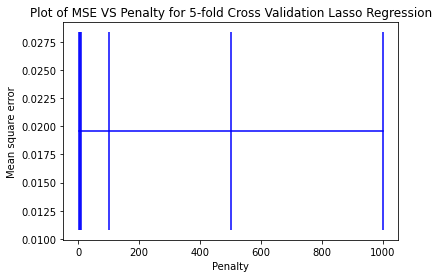

In [14]:
penalty_parameters = [1, 5, 10, 100, 500, 1000]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

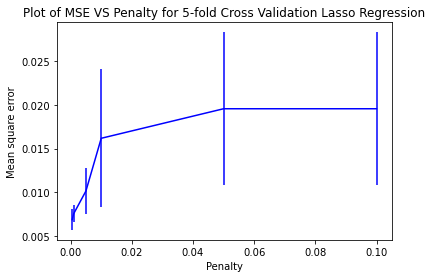

In [15]:
penalty_parameters =  [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

## Getting all Non-Zero features after Tuned Lasso Regression

In [16]:
feature_names = list(final_features_df.columns.values)

In [17]:
def get_lasso_parameters(penalty) : 
    
    lasso_model_dictionary = {}
    X_Train,X_Test,y_Train,y_Test = train_test_split(scaled_features_array, scaled_label_array, test_size = 0.2, random_state=111, shuffle = False)
    lasso_model_params_df = pd.DataFrame(columns = feature_names)
    
    lasso_model = Lasso(alpha = penalty)
    lasso_model.fit(X_Train, y_Train)

    model_dict = {}
    for i in range(len(final_features_df.columns)) :
        model_dict[feature_names[i]] = np.around(lasso_model.coef_[i-2], decimals = 3)

    lasso_model_params_df = lasso_model_params_df.append(model_dict, ignore_index = True)
    
    return lasso_model_params_df


In [18]:
penalty_parameter = 0.0005
lasso_df = get_lasso_parameters(penalty_parameter)

column_names = list()
lasso_param_dictionary = {}
for column_name in lasso_df.columns:
    column = lasso_df[column_name]
    count_of_non_zeros = (column != 0).sum()
    if count_of_non_zeros != 0 : 
        column_names.append(column_name)
        lasso_param_dictionary[column_name] = column[0]

print(f'Total Non-zero Columns: {len(column_names)}')
print(f'Selected Non-zero Column Names: {column_names}')



Total Non-zero Columns: 24
Selected Non-zero Column Names: ['host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'maximum_nights_avg_ntm', 'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'count_amenities', 'property_type_Boat', 'property_type_Entire place', 'property_type_Entire townhouse', 'room_type_Private room', 'bathrooms_text_1 shared bath', 'bathrooms_text_3 baths', "host_verifications_['email', 'work_email']", 'neighbourhood_cleansed_South Dublin', 'asked_tfidf_ftr', 'buses_tfidf_ftr', 'definitely_tfidf_ftr', 'everything needed_tfidf_ftr', 'highly recommended_tfidf_ftr', 'recommend place_tfidf_ftr', 'responsive_tfidf_ftr', 'reviews_sentiment_neutral']


In [19]:
lasso_non_zero_params_df = pd.DataFrame(columns = ['Feature Name', 'Feature Weight'])

for key in lasso_param_dictionary:
    lasso_non_zero_params_df.loc[len(lasso_non_zero_params_df.index)] = [key, lasso_param_dictionary[key]] 

display(lasso_non_zero_params_df)

,Feature Name,Feature Weight
0,host_is_superhost,-0.245
1,host_listings_count,-0.067
2,host_total_listings_count,0.014
3,maximum_nights_avg_ntm,-0.005
4,number_of_reviews_ltm,-0.005
5,calculated_host_listings_count_entire_homes,-0.011
6,calculated_host_listings_count_private_rooms,-0.025
7,count_amenities,-0.005
8,property_type_Boat,0.021
9,property_type_Entire place,0.010


# Models and Hyper-parameter tuning

## Normalising Selected Features Set

In [20]:
selected_features = final_features_df[column_names]

scaler_selected_features = MinMaxScaler()
scaler_selected_features.fit(selected_features)
scaled_selected_features = scaler_selected_features.fit_transform(selected_features)
scaled_selected_features_df = pd.DataFrame(scaled_selected_features, columns = selected_features.columns)

scaler_label = MinMaxScaler()
scaler_label.fit(Y_review_scores_rating)
scaled_label = scaler_label.fit_transform(Y_review_scores_rating)
scaled_Y_review_scores_rating = pd.DataFrame(scaled_label, columns = Y_review_scores_rating.columns)

display(scaled_selected_features_df)
X_train, X_test, y_train, y_test = train_test_split(scaled_selected_features_df, scaled_Y_review_scores_rating, test_size = 0.2, random_state = 111)

scaled_train_feature = np.array(X_train)
scaled_train_label = np.array(y_train)
scaled_test_feature = np.array(X_test)
scaled_test_label = np.array(y_test)

,host_is_superhost,host_listings_count,host_total_listings_count,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,count_amenities,property_type_Boat,property_type_Entire place,...,"host_verifications_['email', 'work_email']",neighbourhood_cleansed_South Dublin,asked_tfidf_ftr,buses_tfidf_ftr,definitely_tfidf_ftr,everything needed_tfidf_ftr,highly recommended_tfidf_ftr,recommend place_tfidf_ftr,responsive_tfidf_ftr,reviews_sentiment_neutral
0,1.0,0.000464,0.000083,1.000000,0.057836,0.000000,0.030303,0.636364,0.0,0.0,...,0.0,0.0,0.014514,0.011499,0.039724,0.012285,0.014204,0.017912,0.000000,0.516147
1,1.0,0.000464,0.000083,0.017794,0.052239,0.000000,0.030303,0.441558,0.0,0.0,...,0.0,0.0,0.021802,0.004611,0.042482,0.019708,0.007919,0.005659,0.000000,0.496352
2,0.0,0.000928,0.000250,0.017794,0.082090,0.000000,0.045455,0.337662,0.0,0.0,...,0.0,0.0,0.008417,0.019555,0.038613,0.004002,0.006892,0.026062,0.001532,0.516045
3,1.0,0.000464,0.000083,0.009786,0.076493,0.000000,0.030303,0.610390,0.0,0.0,...,0.0,0.0,0.001763,0.021812,0.030230,0.002556,0.016833,0.009616,0.001056,0.479325
4,0.0,0.001855,0.000333,0.323843,0.031716,0.090909,0.000000,0.324675,0.0,0.0,...,0.0,0.0,0.000000,0.021785,0.028123,0.021630,0.041165,0.006973,0.000000,0.572719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,0.0,0.000000,0.000000,0.323843,0.000000,0.000000,0.015152,0.103896,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7562,0.0,0.000464,0.000083,0.000890,0.000000,0.000000,0.030303,0.051948,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7563,0.0,0.000464,0.000083,1.000000,0.000000,0.000000,0.030303,0.402597,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7564,0.0,0.000000,0.000083,0.323843,0.000000,0.000000,0.015152,0.519481,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Baseline Model: Linear Regression

In [21]:
Baseline_Linear_Model = LinearRegression()
val_score = cross_val_score(Baseline_Linear_Model, scaled_train_feature, scaled_train_label, cv = 5,scoring = 'neg_mean_squared_error')
print(f'Cross Validation Score for Baseline Linear Regression is: {abs(np.array(val_score).mean())}')


Cross Validation Score for Baseline Linear Regression is: 0.016764862458224998


## Model 1: Tuned Lasso Regression

In [22]:
Lasso_Model = Lasso(alpha = 0.0005)
lasso_val_score = cross_val_score(Lasso_Model, scaled_train_feature, scaled_train_label, cv = 5,scoring = 'neg_mean_squared_error')
print(f'Cross Validation Score for Lasso Model is: {abs(np.array(lasso_val_score).mean())}')


Cross Validation Score for Lasso Model is: 0.016913045488866393


## Model 2: KNN Regression

Cross Validation Score for KNN Regressor is: 0.011002108059137244  for n_neighbors =  1
Cross Validation Score for KNN Regressor is: 0.008606709518851948  for n_neighbors =  3
Cross Validation Score for KNN Regressor is: 0.008178766393507786  for n_neighbors =  5
Cross Validation Score for KNN Regressor is: 0.008123416904283193  for n_neighbors =  7
Cross Validation Score for KNN Regressor is: 0.008117984940589166  for n_neighbors =  9
Cross Validation Score for KNN Regressor is: 0.008319947269560875  for n_neighbors =  11
Cross Validation Score for KNN Regressor is: 0.008545038470159463  for n_neighbors =  13
Cross Validation Score for KNN Regressor is: 0.008765605996193823  for n_neighbors =  15
Cross Validation Score for KNN Regressor is: 0.009021952977443602  for n_neighbors =  17
Cross Validation Score for KNN Regressor is: 0.009335283372345937  for n_neighbors =  19
Cross Validation Score for KNN Regressor is: 0.009674479817814895  for n_neighbors =  21
Cross Validation Score for

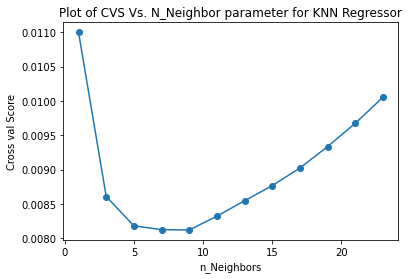

In [23]:
knn_score = []
neighbors = [x for x in range(1, (len(column_names) + 1), 2)]
for neighbor in neighbors:
    KNN_Model = KNeighborsRegressor(n_neighbors = neighbor)
    knn_val_score = cross_val_score(KNN_Model, scaled_train_feature, scaled_train_label, cv = 5,scoring = 'neg_mean_squared_error')
    knn_score.append(abs(np.array(knn_val_score).mean()))
    print(f'Cross Validation Score for KNN Regressor is: {abs(np.array(knn_val_score).mean())}', " for n_neighbors = ", neighbor)
plt.plot(neighbors, knn_score, marker = 'o')
plt.xlabel("n_Neighbors")
plt.ylabel("Cross val Score")
plt.title("Plot of CVS Vs. N_Neighbor parameter for KNN Regressor")
plt.show()


### Tuned KNN Model

In [24]:
Tuned_KNN_Model = KNeighborsRegressor(n_neighbors = 9)
tuned_knn_val_score = cross_val_score(Tuned_KNN_Model, scaled_train_feature, scaled_train_label, cv = 5,scoring = 'neg_mean_squared_error')
print(f'Cross Validation Score for KNN Regression is: {abs(np.array(tuned_knn_val_score).mean())}')


Cross Validation Score for KNN Regression is: 0.008117984940589166
